<a href="https://colab.research.google.com/github/RamKaushal/Pysaprk-Ml-Algorithms/blob/main/Logistic_regression_Using_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 66kB/s 
     |████████████████████████████████| 204kB 42.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=b51e9a121ca665d1d7df38f20b7203153d48b1d4723d72d998157a7d89afe7b9
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName("Logistic Regression").getOrCreate()

In [8]:
from pyspark.sql.types import StructField,StructType,IntegerType

In [14]:
myschema = StructType([
    StructField("Age",IntegerType()),
    StructField('operation Year',IntegerType()),
    StructField('Lymph nodes',IntegerType()),
    StructField('Survival status',IntegerType()),
    ]
)

In [ ]:
'Age',,,

In [17]:
data = spark.read.csv("/content/haberman.csv.data",  schema=myschema,inferSchema=True)

In [18]:
data.show()

+---+--------------+-----------+---------------+
|Age|operation Year|Lymph nodes|Survival status|
+---+--------------+-----------+---------------+
| 30|            64|          1|              1|
| 30|            62|          3|              1|
| 30|            65|          0|              1|
| 31|            59|          2|              1|
| 31|            65|          4|              1|
| 33|            58|         10|              1|
| 33|            60|          0|              1|
| 34|            59|          0|              2|
| 34|            66|          9|              2|
| 34|            58|         30|              1|
| 34|            60|          1|              1|
| 34|            61|         10|              1|
| 34|            67|          7|              1|
| 34|            60|          0|              1|
| 35|            64|         13|              1|
| 35|            63|          0|              1|
| 36|            60|          1|              1|
| 36|            69|

In [19]:
data.count()

306

In [20]:
data.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- operation Year: integer (nullable = true)
 |-- Lymph nodes: integer (nullable = true)
 |-- Survival status: integer (nullable = true)



In [21]:
from pyspark.sql.functions import *

In [23]:
data = data.dropna()

In [24]:
data = data.drop_duplicates()

In [25]:
data.count()

289

In [27]:
data = data.repartition(500)

In [28]:
pdata = data.toPandas()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

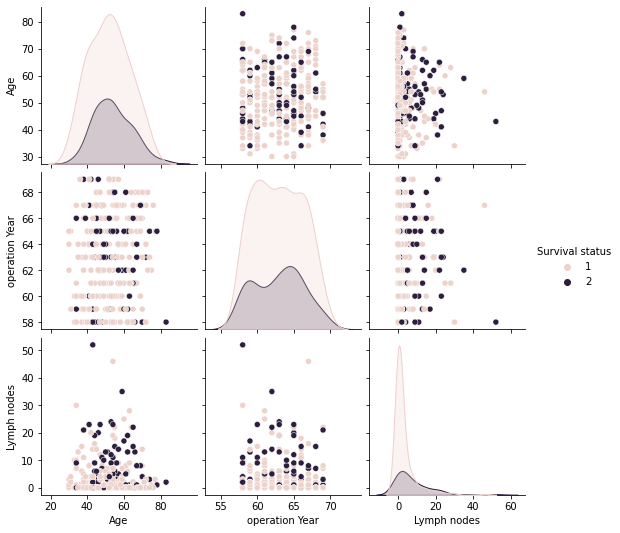

In [31]:
sns.pairplot(data=pdata,hue='Survival status')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30db662128>,
      dtype=object)

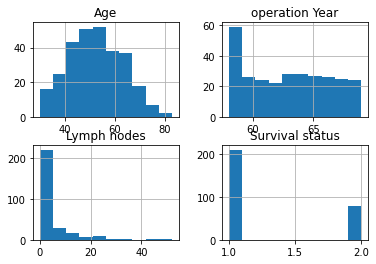

In [32]:
pdata.hist()

In [33]:
from pyspark.ml.feature import VectorAssembler

In [35]:
data.columns

['Age', 'operation Year', 'Lymph nodes', 'Survival status']

In [36]:
outdata = VectorAssembler(inputCols=['Age', 'operation Year', 'Lymph nodes'],outputCol='features')

In [38]:
fdata = outdata.transform(data)

In [39]:
fdata.show()

+---+--------------+-----------+---------------+----------------+
|Age|operation Year|Lymph nodes|Survival status|        features|
+---+--------------+-----------+---------------+----------------+
| 58|            59|          0|              1| [58.0,59.0,0.0]|
| 56|            60|          0|              1| [56.0,60.0,0.0]|
| 44|            63|          1|              1| [44.0,63.0,1.0]|
| 66|            61|         13|              2|[66.0,61.0,13.0]|
| 54|            68|          7|              2| [54.0,68.0,7.0]|
| 47|            66|          0|              1| [47.0,66.0,0.0]|
| 63|            60|          1|              2| [63.0,60.0,1.0]|
| 41|            58|          0|              1| [41.0,58.0,0.0]|
| 70|            58|          4|              2| [70.0,58.0,4.0]|
| 63|            61|         28|              1|[63.0,61.0,28.0]|
| 54|            60|         11|              2|[54.0,60.0,11.0]|
| 38|            66|          0|              1| [38.0,66.0,0.0]|
| 52|     

In [40]:
final_data = fdata.select("Survival status",'features')

In [41]:
final_data.show()

+---------------+----------------+
|Survival status|        features|
+---------------+----------------+
|              1| [58.0,59.0,0.0]|
|              1| [56.0,60.0,0.0]|
|              1| [44.0,63.0,1.0]|
|              2|[66.0,61.0,13.0]|
|              2| [54.0,68.0,7.0]|
|              1| [47.0,66.0,0.0]|
|              2| [63.0,60.0,1.0]|
|              1| [41.0,58.0,0.0]|
|              2| [70.0,58.0,4.0]|
|              1|[63.0,61.0,28.0]|
|              2|[54.0,60.0,11.0]|
|              1| [38.0,66.0,0.0]|
|              1| [52.0,63.0,4.0]|
|              1| [52.0,64.0,0.0]|
|              1| [50.0,63.0,1.0]|
|              2| [74.0,65.0,3.0]|
|              2| [47.0,62.0,0.0]|
|              1| [30.0,62.0,3.0]|
|              2|[46.0,65.0,20.0]|
|              1| [45.0,67.0,1.0]|
+---------------+----------------+
only showing top 20 rows



In [42]:
from pyspark.ml.classification import LogisticRegression

In [43]:
lr = LogisticRegression(featuresCol='features',labelCol='Survival status')

In [44]:
train,test = final_data.randomSplit([0.7,0.3])

In [46]:
training = lr.fit(train)

In [49]:
testing = training.transform(test)

In [50]:
testing.show()

+---------------+----------------+--------------------+--------------------+----------+
|Survival status|        features|       rawPrediction|         probability|prediction|
+---------------+----------------+--------------------+--------------------+----------+
|              1| [47.0,66.0,0.0]|[-11.044776224812...|[2.46854173274420...|       1.0|
|              1| [52.0,63.0,4.0]|[-10.747588772793...|[4.39701279696576...|       1.0|
|              1| [52.0,64.0,0.0]|[-10.856208892729...|[3.41834072268826...|       1.0|
|              2| [47.0,62.0,0.0]|[-10.585318392867...|[4.93843199611082...|       1.0|
|              2|[46.0,65.0,20.0]|[-10.952901140299...|[3.65440101502490...|       2.0|
|              2| [41.0,64.0,0.0]|[-10.765653408171...|[3.56901730976794...|       1.0|
|              2|[41.0,60.0,23.0]|[-10.342100520017...|[9.07528836721141...|       2.0|
|              2| [50.0,64.0,0.0]|[-10.839744259173...|[3.4485759892687E...|       1.0|
|              1|[55.0,69.0,22.0

In [52]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [69]:
mc = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Survival status', metricName='accuracy')

In [70]:
mc.evaluate(testing)

0.7702702702702703